# The Fibonacci sequence (2 pts)

#### The Fibonacci sequence is defined such that each number is the sum of the two previous numbers in the sequence, starting with [1, 1, 2, 3, 5...]. Generate the first 10 elements in the sequence in Python, with the final result as a [list](https://www.tutorialspoint.com/python/python_lists.htm).

In [1]:
fib_sequence = [1, 1]
for i in range(8):
    fib_sequence += [sum(fib_sequence[-2:])]
    
print(fib_sequence)

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]


#### Bonus:   Do the same thing by writing a recursive function.

# Integration in Python (8 pts)
#### We will be using different methods to evaluate $\int^{10}_{1}f(x)$ where $f(x)=x^2+exp^{-x}+10/x$.

####  First, evaluate $\int^{10}_{1}f(x)$ analytically. In other words, integrate $f(x)$ by hand, and then evaluate the bounds in Python.

In [2]:
import numpy as np

def Fint(x):
    return x**3/3. - np.exp(-x) + 10.*np.log(x)

analytical_answer = Fint(10) - Fint(1)
print('The analytical answer = {}'.format(analytical_answer))

The analytical answer = 356.3936849711821


#### Evaluate $\int^{10}_{1}f(x)$ using the [trapezoidal rule](https://en.wikipedia.org/wiki/Trapezoidal_rule) using 5 evenly-spaced points (which yields 4 trapezoids).

In [3]:
import numpy as np


def f(x):
    return x**2 + np.exp(-x) + 10./x

frange = np.linspace(1, 10, 5)

Fint_estimate = 0
for i in range(len(frange)-1):
    Fint_estimate += (frange[i+1]-frange[i])*(f(frange[i+1])+f(frange[i]))/2
    
print('The numerical answer = {}'.format(Fint_estimate))

The numerical answer = 367.39728364075074


#### Now, perform this same trapezoidal integration, but instead of using 5 evenly-spaced points, use 3 evenly-spaced points. Then use 4 points. Then use 5. Then 6. Continue to 100. Then use matplotlib to plot the error between these numerical integrations (relative to the analytical answer) vs. the number of points used to perform the integration; use a logarithmic scale for the y-axis.

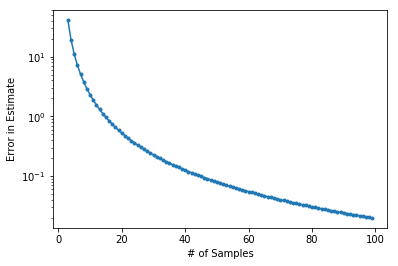

In [4]:
import numpy as np
import matplotlib.pyplot as plt 


def f(x):
    return x**2 + np.exp(-x) + 10./x

def quad_estimate(N):
    Fint_estimate = 0
    frange = np.linspace(1, 10, N)
    for i in range(len(frange) - 1):
        Fint_estimate += (frange[i + 1] - frange[i]) * \
            (f(frange[i + 1]) + f(frange[i])) / 2
    return Fint_estimate

Nrange = range(3, 100)
quad_estimates = list(map(quad_estimate, Nrange))

plt.semilogy(Nrange, quad_estimates-analytical_answer, '.-')
#plt.plot(scipy_quad_results[2]['neval'], scipy_quad_results[0]-exact_answer, 'o')
plt.xlabel('# of Samples')
plt.ylabel('Error in Estimate')
plt.show()

#### Evaluate $\int^{10}_{1}f(x)$ using functions from [`scipy.integrate`](https://docs.scipy.org/doc/scipy/reference/integrate.html). Determine the error between Scipy's solution and the analytical solution. Then determine the number of evaluations that Scipy used to arrive at the answer.

In [5]:
from scipy.integrate import quad
import numpy as np


def f(x):
    return x**2 + np.exp(-x) + 10. / x

scipy_quad_results = quad(f, 1, 10, full_output=True)

print('Final answer = {}'.format(scipy_quad_results[0]))
print('Error = {}'.format(scipy_quad_results[0]-analytical_answer))
print('# Evaluations = {}'.format(scipy_quad_results[2]['neval']))

Final answer = 356.3936849711822
Error = 1.1368683772161603e-13
# Evaluations = 63


#### Read the description of the `scipy.integrate.quad` function. Why do Scipy and the trapezoidal method give different answers? This is an example of how two numerical methods, despite solving the same problem, can have drastically different accuracies. When possible, use a pre-built method from one of the many built-in python libraries. Google is your friend.

# Curve fitting two ways (8 pts)
#### We saw in class how to use `fsolve` to solve for the root of an equation. Let's use the same function to fit the data. If you remember, we wanted to fit a rate law of the form $K=e^{-\Delta G/RT}$. You're going to fit some experimental data to determine the apparent free energy, $\Delta G$, from rate/temperature date.

In [6]:
#Experimental rate data collected at a number of points.  Each entry in the list is a combination of a temperature and a rate measurement.  
experimental_data=[(203.96935366605618, 3.6236800011478305), (245.69114764482345, 2.5689954976962932), (239.63438120412232, 2.5713366188827265), (189.36591228846885, 3.1540244055624758), (111.43204914150688, 8.1696752407461783), (207.32680522705272, 3.026045517845918), (264.8393324954053, 2.4416420424392249), (144.85766191924512, 5.1482403318133469), (124.84448741258993, 6.5462805948653529), (109.11582701887153, 9.5459326923835963), (109.14575513306579, 8.701586669774322), (153.76859067461749, 4.9682826810133864), (246.59886090908026, 2.7941491059160417), (145.08430033257423, 5.3798783290838301), (181.48630172255744, 3.3786473079440942), (296.00840136351894, 2.7076518974888186), (143.51791746953251, 5.2283390658181625), (291.33779532362166, 1.9130435659045719), (130.65687336694253, 6.479997876184644), (267.9807806900896, 2.8677012219049618), (232.66081388011543, 3.2860854111655939), (298.65839492102384, 2.366780626113413), (280.43866195918883, 2.0389654773857879), (273.45156179153878, 2.2732288646263061), (266.23615785290224, 2.5199497092331762), (139.69880734182109, 5.3218862610124091), (248.32274960154558, 2.9751709238837432), (119.33547334977861, 7.6779774629955426), (115.84875500204355, 8.2377243679585082), (112.12311197712026, 8.9201008361384204), (266.93119983401641, 2.9565481485864806), (187.05077060298555, 4.0088838201523149), (103.85112749577554, 10.032991787687269), (198.90333963103947, 3.6822393220531722), (195.49304748667089, 3.2713352779807159), (292.63056978401187, 2.2042519892918793), (217.02147505796466, 2.8111877951917199), (201.33078125784647, 3.1775229263026636), (216.37990435154126, 2.9256344629180924), (281.50670292987559, 1.9933463522298778), (211.56148022544059, 3.0773921955233199), (133.11995792016782, 6.5682826888103056), (191.68563190316667, 3.4379386715422964), (285.17511666000246, 2.4537442491121171), (254.94338341999406, 2.1552075747097761), (227.63603305109274, 2.4546627992454644), (230.17654229002088, 3.2077960310435225), (177.76631733590341, 4.2148539864942531), (174.49707572077983, 4.403014573195728), (100.5210960776798, 11.046854338400221), (141.1260218959988, 5.1055128973332531), (200.28225702824335, 3.1968177710127277), (267.68867211105407, 2.8018708963966579), (128.8809959552226, 6.796888943234479), (209.65910535851197, 3.3430911403901469), (285.14483063498903, 2.5726698754266852), (171.92317896938238, 4.1256045510260195), (158.07639389549189, 5.0795224010122979), (113.19666217333469, 7.9426707556544232), (193.48966030242107, 3.1722804406157343), (255.07329354144537, 2.3344124005137377), (195.28068107295562, 3.4573465897461508), (183.09725218584222, 3.2249328487824225), (135.95121929524774, 5.4153477686167175), (267.47601424004125, 2.3212487554600036), (215.8969424087125, 2.7946129548309626), (113.93297318297932, 8.1609464202344668), (203.31353375613435, 3.4971561246431224), (158.68449233558033, 4.538225058225497), (183.45844792035984, 3.4459350872523986), (156.16290402828591, 4.2852214699536253), (280.6398476314381, 1.9176106807059239), (140.94426342931845, 5.1533855583412427), (175.62052653070822, 4.0434904236526572), (186.07999195301434, 3.4414274801117868), (234.13238756182704, 3.1589330490903196), (237.9183918239728, 3.021185463566284), (113.3629902933059, 7.8521790858837237), (138.16666669007344, 5.6283905540747856), (129.83386512795178, 5.9957233266021204), (217.21859499857163, 2.8353008897700707), (252.70524179629422, 2.7277927526130439), (216.75453259096082, 3.5249659388859351), (159.14482568642438, 4.772017375345083), (219.51226392175252, 2.7242634665703145), (244.03849796909088, 2.6010537089914068), (170.73657567094938, 4.4017327441768153), (139.04336390741207, 5.9218621403594858), (233.99576678643649, 2.4296255018678501), (155.7527106158966, 4.7151482622656502), (133.19681725820718, 5.6937119116585535), (242.76647988792055, 2.6353213576862471), (189.1788922720159, 3.3385707870618901), (247.03945453501777, 2.972159429935691), (234.02696189516342, 2.9823121771307903), (129.90075057086969, 6.0769569333148192), (276.36743553532108, 2.5350931205675171), (237.48595334396069, 3.1120208936124176), (169.31498940778619, 4.1020927705134218), (194.84992167847139, 3.5816350401484569)]


#### First, make separate vectors of the temperature data (T) and rate data (K) using the [zip(*)](https://docs.python.org/3/library/functions.html) function 

In [7]:
T,K=zip(*experimental_data)

#### Now, let's fit the curve using ordinary least square, minimizing $\sum_i [K_i-f(T_i)]^2$ (the sum of the residual errors between the function and the experimental data point).

#### Create a [Python function](https://www.tutorialspoint.com/python/python_functions.htm) to calculate the sum-of-squared-errors a function of the fitted parameter, $\Delta G$. Use [`scipy.optimize.minimize`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) to find the $\Delta G$ value that minimizes this sum-of-squared-errors function.

In [8]:
import numpy as np
from scipy.optimize import minimize

R = 8.3145

def leastsquares(G):
    return np.sum((np.exp(-G/R/T)-K)**2.)

results = minimize(leastsquares, 10)
print('The fitted dG is {}'.format(results['x'][0]))

The fitted dG is -1993.6290507090923


#### Use matplotlib to plot the experimental data points and the fitted curve over the temperature range 100 to 300; add the RMSE of the fitted curve to the plot.

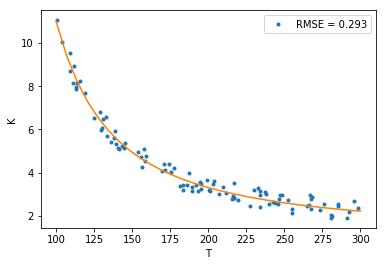

In [9]:
import matplotlib.pyplot as plt
import numpy as np

spacing=np.linspace(100,300,30)

RMSE=np.sqrt(np.mean((K-np.exp(-results['x'][0]/8.3145/T))**2.))
plt.plot(T, K, '.', label='RMSE = {:1.3f}'.format(RMSE))
plt.legend()
plt.plot(spacing,np.exp(-results['x'][0]/8.3145/spacing))
plt.xlabel('T')
plt.ylabel('K')

plt.show()

#### Now, do the curve fitting using the [`scipy.optimize.curve_fit`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) routine.  Make a plot comparing the resulting functions from the curve_fit and the scipy.minimize routines.

The fitted dG is -1993.6290527736667


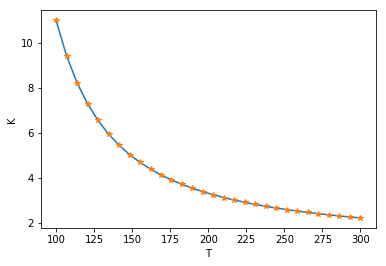

In [10]:
import numpy as np
from scipy.optimize import curve_fit

R = 8.3145

def K_fun(T,G):
    return np.exp(-G/R/T)

resultsnew = curve_fit(K_fun,T,K)
print('The fitted dG is {}'.format(resultsnew[0][0]))

# comapring scipy.optimize and least square method
plt.plot(spacing,np.exp(-results['x'][0]/8.3145/spacing))
plt.plot(spacing,np.exp(-resultsnew[0][0]/8.3145/spacing),'*')
plt.xlabel('T')
plt.ylabel('K')
plt.show()

#### In this case, the results should be identical using the two methods, since it's the same mathematical operation (`curve_fit` uses least_squares by default). There will probably be many ways to solve the same problem in Python using different libraries or methods. Different methods that achieve the same results are ok and expected.  

## How many hours did this assignment take you?